In [2]:
# k-최근접 이웃의 한계
# http://bit.ly/perch_data

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [5]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
# 만약 길이가 50cm인 농어의 무게를 예측하고 싶다면?
# knn 회귀 모델로 예측을 했을 때 50cm 길이의 농어의 무게가 현저히 낮게 예측됨

print(knr.predict([[50]]))

[1033.33333333]


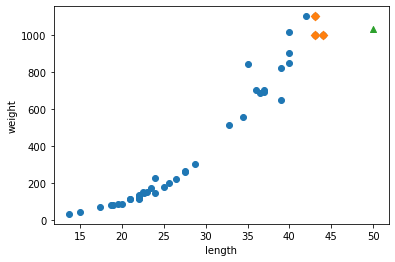

In [8]:
# 그 이유는?

import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 찍어보기
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

# 이웃된 샘플은 다이아몬드 모양으로 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- 길이가 50cm이고 무게가 1033g이라고 가정한 농어의 데이터는 세모로 표시
- 50cm에서 가장 가까운 농어의 샘플들은 대략 45cm 농어의 무게이므로 k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다
- 그러므로 50cm 길이의 농어의 무게가 45cm 길이의 농어의 무게와 비슷하게 나오게 되는 것

In [9]:
# 길이가 현저히 긴 100cm 농어의 무게도 마찬가지

print(knr.predict([[100]]))

[1033.33333333]


In [10]:
# 이러한 문제를 해결하기 위해 나온 모델이 선형 회귀(linear regression)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


- 직선의 그래프를 그려 농어 데이터 샘플에 가장 적합한 직선을 찾아낸 것
- 직선 그래프 : y = ax + b
- y = 농어의 무게, x = 농어의 길이
- LinearRegression 클래스는 가장 적합한 a, b의 값을 찾는 모델
- lr 객체에 coef_, intercept_ 속성이 저장되어 있음
- coef_ = a, intercept_ = b라고 할 수 있음

In [12]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


- coef_, intercept_ 를 머신러닝 알고리즘이 찾은 값이라는 의미로 "모델 파라미터"라고 함
- 많은 머신러닝 알고리즘의 훈련 과정은 이러한 최적의 모델 파라미터를 찾는 것과 같음
- coef_ = a, intercept_ = b
- 따라서 일차 방정식은 대략 : y = 39.02x - 709.02 이라고 할 수 있음

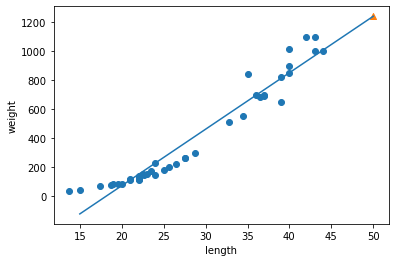

In [15]:
# 일차 방정식을 기존 농어 샘플 그래프 위에 그려보기

plt.scatter(train_input, train_target)

# 농어의 길이 15에서 50까지의 최적의 선형 회귀 직선 그래프를 그려보기
# x = 농어의 길이이므로 y = 15a + b  그래프를 만들면 된다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [16]:
# 점수 확인

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 과대적합(overfitting)이 발생
- 훈련 세트의 점수도 그리높지 않음
- 산점도 그래프에서 볼 수 있듯이 농어 데이터 샘플의 분포가 직선보다는 이차방정식의 곡선 형태에 더욱 가까움
- 게다가 y 절편(intercept_)는 음수가 나왔는데 y의 값(무게)가 음수가 될 수는 없음

## 다항 회귀
- 선형 회귀의 곡선 형태

- y = ax^ + bx + c
- x = 농어의 길이 이므로 농어의 길이를 제곱한 데이터 또한 필요하기 때문에 기존 길이 데이터를 제곱해야함

In [17]:
# 길이 데이터들을 제곱한 값들을 이어 붙인 새로운 데이터 셋 만들기 

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [18]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [20]:
# 새로운 데이터셋으로 새로운 선형회귀 모델 훈련하기

lr = LinearRegression()

lr.fit(train_poly, train_target)

# 50cm 농어 무게 예측하기
# 마찬가지로 예측할 새로운 샘플 또한 제곱한 값을 같이 넣어주어야 예측할 수 있음

print(lr.predict([[50 **2, 50]]))

[1573.98423528]


In [21]:
# y = ax^ + bx + c
# 마찬가지로 a, b, c의 값은 lr 객체에 저장되어 있음

print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278304


- y = 1.01x^ - 21.56x + 116.05

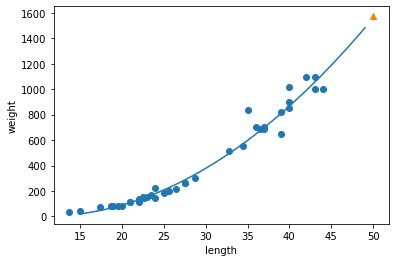

In [22]:
# 마찬가지로 기존의 농어 데이터 샘플 그래프 위에 이차 방정식 그래프 얹어보기

# 길이 15에서 50의 그래프로 나타내기
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6 * point + 116.05)
# = plt.plot(point, point*lr.coef_[0]**2 + point*lr.coef_[1] + lr.intercept_)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [23]:
# 점수 확인

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


- 훨씬 더 높은 점수의 예측이 가능해졌음
- 아직 약간의 과소적합이 발생했기 때문에 더욱 복잡한 모델 필요